In [43]:
from classifier import *
from train_classifier import create_trainer, weights_params_paths, get_val_idx
from fastai.conv_learner import *
from fastai.dataset import *
import sklearn.metrics as metrics

Parameters common to both classifiers.

In [17]:
PATH = Path('/home/sean/hpc-home/skin_cancer')
arch = resnet101
im_size = 100
bs = 64
num_workers = 8
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'

### Load the Mel Classifier

In [18]:
train_csv = PATH / 'train_multi_Mel_half.csv'
test_csv = PATH / 'ISIC/test_mel_17.csv'
test_path = PATH / test_folder

assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
val_idx = get_val_idx(train_csv)

_, params_file_name = weights_params_paths(weight_name)

weight_name = "res101_Mel_mutli_half_2018-12-11"

mel_params_dict = {'path': PATH, 'arch': arch, 'sz': im_size,
               'bs': bs, 'trn_csv': train_csv, 'sn': weight_name,
               'test_csv': test_csv, 'test_folder': test_folder, 'val_idx': val_idx,
               'precom': False, 'num_workers': num_workers, 'lr': 1e-2, 'aug_tfms': transforms_top_down,
               'params_fn': params_file_name, 'precom': False}
print(mel_params_dict)

{'path': PosixPath('/home/sean/hpc-home/skin_cancer'), 'arch': <function resnet101 at 0x7f45caaee840>, 'sz': 100, 'bs': 64, 'trn_csv': PosixPath('/home/sean/hpc-home/skin_cancer/train_multi_Mel_half.csv'), 'sn': 'res101_Mel_mutli_half_2018-12-11', 'test_csv': PosixPath('/home/sean/hpc-home/skin_cancer/ISIC/test_mel_17.csv'), 'test_folder': 'ISIC/ISIC-2017_Test_v2_Data_Classification/', 'val_idx': range(3797, 3947), 'precom': False, 'num_workers': 8, 'lr': 0.01, 'aug_tfms': [<fastai.transforms.RandomRotate object at 0x7f45c479b4a8>, <fastai.transforms.RandomLighting object at 0x7f45c479b438>, <fastai.transforms.RandomDihedral object at 0x7f45c479b550>], 'params_fn': '/home/sean/src/fastai/courses/projects/param_files/res101_Mel_mutli_half_2018-12-11_2018-12-12__09-55_.json'}


In [19]:
mel_trainer = create_trainer(mel_params_dict)
mel_trainer.check_test_names()

Saving model as "res101_Mel_mutli_half_2018-12-11"
-> Train set value counts
0    3100
1     847
Name: bin_class, dtype: int64
Test set value counts
0    483
1    117
Name: melanoma, dtype: int64
Dataset has: ['0', '1'] classes


In [21]:
mel_trainer.load('res101_Mel_mutli_half_2018-12-11_3')

In [ ]:
ConvLearner

### Load the SK Classifier

In [22]:
train_csv = PATH / 'train_mutli_SK_half.csv'
test_csv = PATH / 'ISIC/test_ker_17.csv'
test_path = PATH / test_folder

assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
val_idx = get_val_idx(train_csv)

_, params_file_name = weights_params_paths(weight_name)

weight_name = 'res101_SK_mutli_half_2018-12-11'

sk_params_dict = {'path': PATH, 'arch': arch, 'sz': im_size,
               'bs': bs, 'trn_csv': train_csv, 'sn': weight_name,
               'test_csv': test_csv, 'test_folder': test_folder, 'val_idx': val_idx,
               'precom': False, 'num_workers': num_workers, 'lr': 1e-2, 'aug_tfms': transforms_top_down,
               'params_fn': params_file_name, 'precom': False}
print(sk_params_dict)

{'path': PosixPath('/home/sean/hpc-home/skin_cancer'), 'arch': <function resnet101 at 0x7f45caaee840>, 'sz': 100, 'bs': 64, 'trn_csv': PosixPath('/home/sean/hpc-home/skin_cancer/train_mutli_SK_half.csv'), 'sn': 'res101_SK_mutli_half_2018-12-11', 'test_csv': PosixPath('/home/sean/hpc-home/skin_cancer/ISIC/test_ker_17.csv'), 'test_folder': 'ISIC/ISIC-2017_Test_v2_Data_Classification/', 'val_idx': range(3797, 3947), 'precom': False, 'num_workers': 8, 'lr': 0.01, 'aug_tfms': [<fastai.transforms.RandomRotate object at 0x7f45c479b4a8>, <fastai.transforms.RandomLighting object at 0x7f45c479b438>, <fastai.transforms.RandomDihedral object at 0x7f45c479b550>], 'params_fn': '/home/sean/src/fastai/courses/projects/param_files/res101_Mel_mutli_half_2018-12-11_2018-12-12__09-55_.json'}


In [23]:
sk_trainer = create_trainer(sk_params_dict)
sk_trainer.check_test_names()

Saving model as "res101_SK_mutli_half_2018-12-11"
-> Train set value counts
0    3639
1     308
Name: bin_class, dtype: int64
Test set value counts
0    510
1     90
Name: keratosis, dtype: int64
Dataset has: ['0', '1'] classes


In [24]:
sk_trainer.load('res101_SK_mutli_half_2018-12-11_3')

### Data Loader

In [35]:
# The network architecture to use, resnet34 is a good start, will get better performance with 
# resnext50 or inception_4

train_csv = PATH / 'train_multi_half_ia_nervi.csv'
test_csv = PATH / 'ISIC/test_isic17.csv'
test_path = PATH / test_folder

trn_df = pd.read_csv(train_csv)
tst_df = pd.read_csv(test_csv, index_col=[0])

# Dataset augmentations
tfms = tfms_from_model(arch, im_size, aug_tfms=transforms_top_down)
# The dataloader, used for training and evaluation, has numerous useful functions for:
# loading data, preprocessing, batching, obtaining basic stats, and more
data = ImageClassifierData.from_csv(PATH, '', train_csv, test_name=test_folder, tfms=tfms, bs=bs)
data.test_ds.fnames = sorted(data.test_ds.fnames)

In [36]:
trn_df['classes'].value_counts()

nevus        2792
melanoma      847
keratosis     308
Name: classes, dtype: int64

In [37]:
tst_df['classes'].value_counts()

nevus                   393
melanoma                117
seborrheic_keratosis     90
Name: classes, dtype: int64

---
# Combine Predictions
---

In [62]:
ys = data.trn_y
ds = data.trn_ds
test_dl = data.test_dl

Text(0.5, 0.98, 'Sample melanoma images (class id=1; 677 total)')

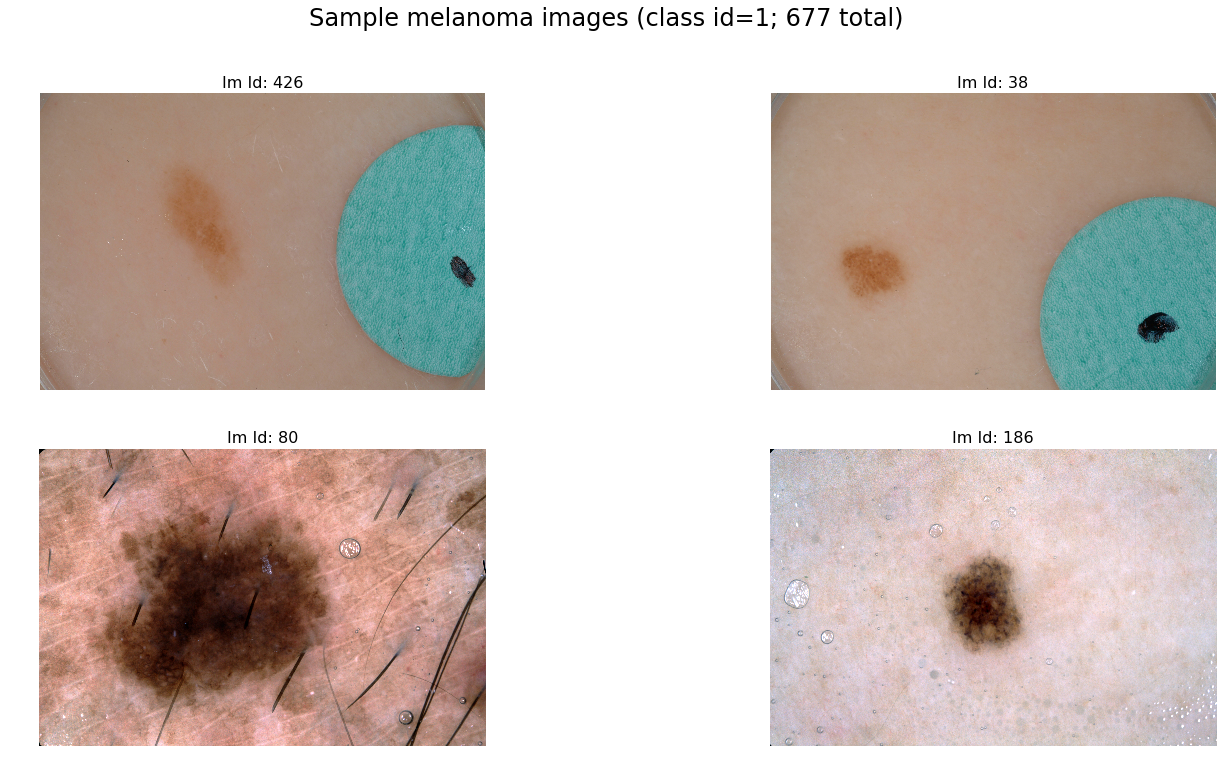

In [61]:
cls2n = data.classes
figsize=(24, 12)
idm = [i[0] for i in np.random.randint(0,500,size=(4,1))]
ims = [load_img_id(PATH, ds, i) for i in idm]
r = np.ceil(len(ims) / 3).astype(int)
tt = 'Sample {} images (class id={}; {} total)'.format(
    cls2n[c], c, np.sum(ys == c))
plots(ims, figsize=figsize, rows=r, titles=[
      "Im Id: {}".format(i) for i in idm])
plt.suptitle(tt, fontsize=24)

In [63]:
mel_preds, targs = predict_with_targs(mel_trainer.learn.model, test_dl)

In [64]:
sk_preds, targs = predict_with_targs(sk_trainer.learn.model, test_dl)

In [78]:
test_csv = PATH / 'ISIC/test_isic17.csv'
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
y = load_csv_labels(csv_=test_csv, folder=test_folder)
# 2 is SK
# 1 is nevus
# 0 is mel

Loading ys from csv; shape (600,); vals [0 1 2]; in folder "ISIC/ISIC-2017_Test_v2_Data_Classification/"


In [89]:
sk_binary_preds = np.argmax(sk_preds, axis=1)
mel_binary_preds = np.argmax(mel_preds, axis=1)
print('mel preds {}'.format(np.unique(mel_binary_preds, return_counts=True)))
print('sk preds {}'.format(np.unique(sk_binary_preds, return_counts=True)))

mel preds (array([0, 1]), array([454, 146]))
sk preds (array([0, 1]), array([561,  39]))


Take the 1 prediction from either network if no overlap. If overlap take Mel predictions

In [91]:
final_preds = np.ones(np.shape(sk_binary_preds))
final_preds[sk_binary_preds == 1] = 2
final_preds[mel_binary_preds == 1] = 0
np.unique(final_preds, return_counts=True)

(array([0., 1., 2.]), array([146, 418,  36]))

In [92]:
metrics.accuracy_score(y, final_preds)

0.605

In [103]:
print(metrics.classification_report(y, final_preds, target_names=['melanoma', 'nevus', 'keratosis']))

             precision    recall  f1-score   support

   melanoma       0.36      0.44      0.40       117
      nevus       0.72      0.77      0.74       393
  keratosis       0.28      0.11      0.16        90

avg / total       0.58      0.60      0.59       600



In [95]:
data.classes

['keratosis', 'melanoma', 'nevus']

[[ 52  57   8]
 [ 74 301  18]
 [ 20  60  10]]


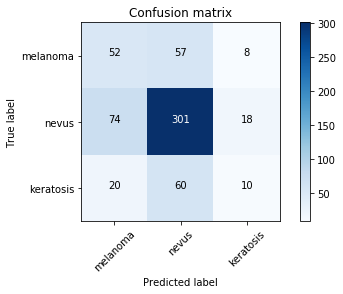

In [99]:
myclasses = ['melanoma', 'nevus', 'keratosis']
cm = metrics.confusion_matrix(y, final_preds)
plot_confusion_matrix(cm, myclasses, cmap=plt.cm.Blues)

---
## Test Cloudvis stuff
---

In [138]:
# Load Classifier
PATH = Path('/home/sean/hpc-home/skin_cancer')
arch = resnet101
im_size = 100
bs = 1
num_workers = 8
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
train_csv = PATH / 'train_multi_Mel_half.csv'
test_csv = PATH / 'ISIC/test_mel_17.csv'
test_path = PATH / test_folder

assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
val_idx = None

params_file_name = 'blah'

weight_name = "res101_Mel_mutli_half_2018-12-11"

p_dict = {'path': PATH, 'arch': arch, 'sz': im_size,
                   'bs': bs, 'trn_csv': train_csv, 'sn': weight_name,
                   'test_csv': test_csv, 'test_folder': test_folder, 'val_idx': val_idx,
                   'precom': False, 'num_workers': num_workers, 'lr': 1e-2, 'aug_tfms': transforms_top_down,
                   'params_fn': params_file_name, 'precom': False}


_, v_class_tfms = tfms_from_model(arch, im_size, aug_tfms=p_dict['aug_tfms'])
class_denorm = v_class_tfms.denorm

mel_trainer = create_trainer(p_dict)
mel_trainer.load('res101_Mel_mutli_half_2018-12-11_3')
sk_trainer = create_trainer(p_dict)
sk_trainer.load('res101_SK_mutli_half_2018-12-11_3')

Saving model as "res101_Mel_mutli_half_2018-12-11"
-> Train set value counts
0    3100
1     847
Name: bin_class, dtype: int64
Test set value counts
0    483
1    117
Name: melanoma, dtype: int64
Dataset has: ['0', '1'] classes
Saving model as "res101_Mel_mutli_half_2018-12-11"
-> Train set value counts
0    3100
1     847
Name: bin_class, dtype: int64
Test set value counts
0    483
1    117
Name: melanoma, dtype: int64
Dataset has: ['0', '1'] classes


In [149]:
_, v_class_tfms = tfms_from_model(arch, im_size, aug_tfms=transforms_top_down)
v_class_tfms.denorm
v_class_tfms.tfms[0]

In [ ]:
from segment_cloudvis import run_model, denorm_img

In [142]:
img = open_image('/home/sean/hpc-home/skin_cancer/ISIC/ISIC-2017_Training_Data/ISIC_0000021.jpg')
# img.shape
# img = np.rollaxis(img, 2, 0)
img.shape

(1129, 1504, 3)

In [158]:
nim = class_denorm(img)
v_class_tfms.tfms #[0](img, None)[0].shape
# nim.shape

In [161]:
sk_p, _ = run_model(sk_trainer.learn.model, img, prepIm=v_class_tfms)
mel_p, _ = run_model(mel_trainer.learn.model, img, prepIm=v_class_tfms)

In [174]:
sk_p, np.exp(sk_p)

(array([-0.00023, -8.38672], dtype=float32),
 array([0.99977, 0.00023], dtype=float32))

In [168]:
sk = np.argmax(sk_p)
mel = np.argmax(mel_p)
mel, sk

(1, 0)

In [169]:
# 2 is SK
# 1 is nevus
# 0 is mel

pred = 'Nevus'
if sk == 1:
    pred = 'Seborrheic Keratosis'
# Mel pred trumps SK
if mel == 1:
    pred = 'Melanoma'

In [170]:
pred

'Melanoma'